In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [2]:
# import data and describing it
seeds = pd.read_csv('/users/brandonk87/downloads/seeds.csv')
seeds.describe()

,X1,X2,X3,X4,X5,X6,X7,Y
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [3]:
seeds.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# Question 2

In [4]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x = seeds.iloc[:,:7]
    # selecting the first 7 rows as "x" data
y = seeds[["Y"]]
    # selecing the Y column as "y" data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
    # splitting the x and y data into training and testing sets
    # uses 0.3 split where 70% is training and 30% is testing

/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Question 3

In [5]:
# standarizing the data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
    # assign a name (scale) to the StandardScaler function

x_train=scale.fit_transform(x_train)
    # apply the function to the x_train data
    # fit_transform will standardize based on itself
x_test=scale.transform(x_test)
    # not standarized based on itself, but rather based 
    ## on the train data to ensure it is consistant

print("x_train average is now:",np.average(x_train))
    # the mean should be 0
print("x_test average is now:",np.average(x_test))
    # the mean should be close to 0 but not 
    ## exactly bc it is based on the train data

x_train average is now: 9.235674529437648e-17
x_test average is now: 0.18933898512149963


# Question 4

In [6]:
# KNN, confusing matrix and accuracy score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=5)
    # define the function and how many K neighbors
classifier.fit(x_train,y_train)
    # apply the function to the train data
y_pred = classifier.predict(x_test)
    # use the model we just made to predict y
    ## values based on the x_test data

print("accuracy score is:", metrics.accuracy_score(y_test,y_pred))
    # gives the % that were correctly predicted based on 
    ## its respective y_test values
print(confusion_matrix(y_test,y_pred))
    # confusion matrix

accuracy score is: 0.8888888888888888
[[18  2  2]
 [ 2 23  0]
 [ 1  0 15]]


/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Question 5

In [7]:
# Cross Validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
CVScore = []
    # creates an empty array 

for i in range(1,21):
        # a for loop of 20 values
    classifier = KNeighborsClassifier(n_neighbors=i)
        # define the function using "i" neighbors
    CV = cross_val_score(classifier, x_train, y_train, cv=10)
        # applies the KNN function using a 10 fold cross validation
        # also gets the cv score for each of the 20 KNN functions
    CVScore.append(np.mean(CV))
        # adds the mean of each cv score to the empty array

/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed 

In [8]:
CVScore1 = pd.DataFrame(CVScore,columns=["accuracy score"])
print(CVScore1)
print("The optimal number of K neighbors is:",CVScore1["accuracy score"].idxmax()+1)

    accuracy score
0         0.944762
1         0.930952
2         0.938095
3         0.924762
4         0.938095
5         0.938571
6         0.945238
7         0.945714
8         0.939048
9         0.939048
10        0.952381
11        0.945714
12        0.945714
13        0.945714
14        0.945714
15        0.931905
16        0.945238
17        0.938571
18        0.938571
19        0.945714
The optimal number of K neighbors is: 11


Text(0, 0.5, 'Cross Validation Score')

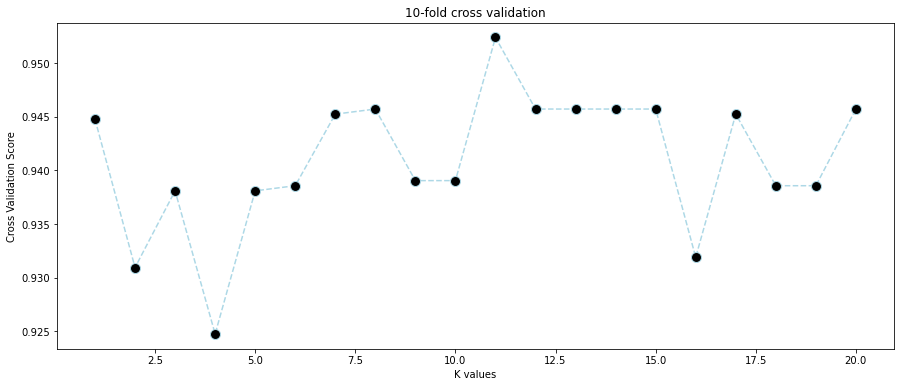

In [9]:
plt.figure(figsize=(15,6))
plt.plot(range(1,21), CVScore, color='lightblue',
         linestyle='dashed', marker = 'o', 
         markerfacecolor='black', markersize=10)
plt.title('10-fold cross validation')
plt.xlabel('K values')
plt.ylabel('Cross Validation Score')

# Question 6

In [19]:
classifier = KNeighborsClassifier(n_neighbors=CVScore1["accuracy score"].idxmax()+1)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

print("accuracy score is:", metrics.accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy score is: 0.873015873015873
[[17  2  3]
 [ 2 23  0]
 [ 1  0 15]]


/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Question 7 Bonus

In [11]:
accuracy = [[] for f in range(21)]
    # creating 20 blank arrays (for each K neighbor that will be used)
for j in range(1,101):
    x2 = x_train
    y2 = y_train
    x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2)
        # repeats the splitting of training data 100 times 
    
    for i in range(1,21):
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(x_train2,y_train2)
        y_pred2 = classifier.predict(x_test2)
            # tests each K neighbor value againt the original test data
        accuracy[i].append(metrics.accuracy_score(y_test2,y_pred2))
            # adds each K neighbor accuracy score to its respective array

/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed 

In [12]:
average=[]
for i in range(1,21):
    average.append(np.mean(accuracy[i]))

std=[]
for i in range(1,21):
    std.append(np.std(accuracy[i]))

In [13]:
print(average)
print(std)

[0.9390000000000004, 0.9310000000000003, 0.9386666666666669, 0.9340000000000004, 0.9333333333333336, 0.9393333333333337, 0.9430000000000003, 0.9410000000000003, 0.9433333333333336, 0.9413333333333336, 0.9433333333333335, 0.939666666666667, 0.9436666666666668, 0.9366666666666669, 0.9430000000000001, 0.9363333333333336, 0.939666666666667, 0.9356666666666669, 0.9366666666666669, 0.9330000000000003]
[0.03713488925525427, 0.03951230469388266, 0.03390181902690965, 0.03915212496006938, 0.036514837167011066, 0.038116779623794145, 0.0347355085691221, 0.03554496370014244, 0.03756475889861548, 0.036551333764994115, 0.03696845502136471, 0.039635842365212816, 0.03611555528208493, 0.036055512754639876, 0.03568223959089762, 0.03890015709765478, 0.03702701716314722, 0.03749222141547052, 0.03636237371545237, 0.03815028760631359]


Text(0, 0.5, 'average')

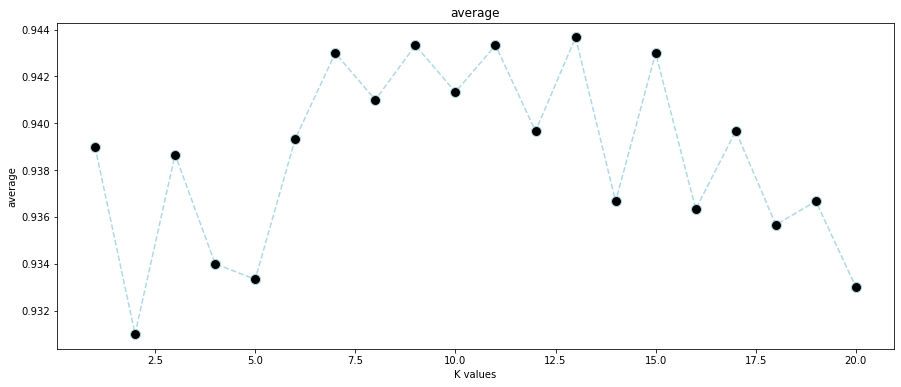

In [14]:
plt.figure(figsize=(15,6))
plt.plot(range(1,21), average, color='lightblue',
         linestyle='dashed', marker = 'o', 
         markerfacecolor='black', markersize=10)
plt.title('average')
plt.xlabel('K values')
plt.ylabel('average')

In [15]:
average = pd.DataFrame(average,columns=["Average"])
print(average)
print("The optimal K neighbor value based on average accuracy score is:",average["Average"].idxmax()+1)

     Average
0   0.939000
1   0.931000
2   0.938667
3   0.934000
4   0.933333
5   0.939333
6   0.943000
7   0.941000
8   0.943333
9   0.941333
10  0.943333
11  0.939667
12  0.943667
13  0.936667
14  0.943000
15  0.936333
16  0.939667
17  0.935667
18  0.936667
19  0.933000
The optimal K neighbor value based on average accuracy score is: 13


Text(0, 0.5, 'std')

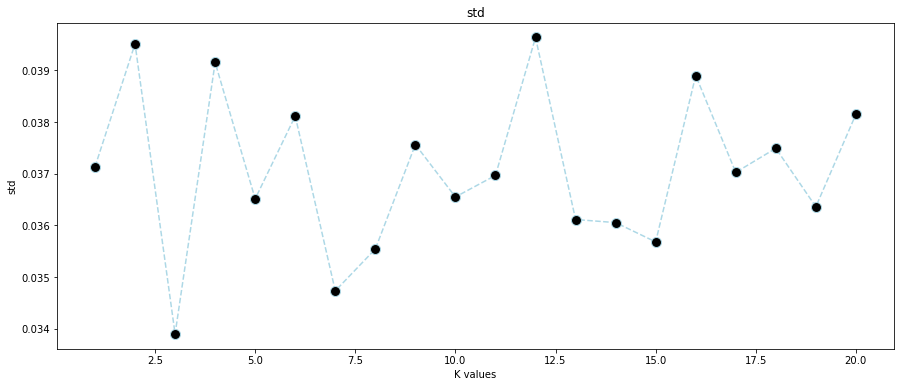

In [16]:
plt.figure(figsize=(15,6))
plt.plot(range(1,21), std, color='lightblue',
         linestyle='dashed', marker = 'o', 
         markerfacecolor='black', markersize=10)
plt.title('std')
plt.xlabel('K values')
plt.ylabel('std')

# final test of the model against the original test data

In [17]:
classifier = KNeighborsClassifier(n_neighbors=average["Average"].idxmax()+1)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

print("accuracy score is:", metrics.accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy score is: 0.8571428571428571
[[16  2  4]
 [ 2 23  0]
 [ 1  0 15]]


/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
